**Enunciado:** Usando técnicas de Visualização de Dados, construa um gráfico a partir dos seguintes dados:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
index = ['Recebidos', 'Processados']
colunas = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
dados = [[160, 184, 241, 149, 180, 161, 132, 202, 160, 139, 149, 177], [160, 186, 237, 148, 181, 150, 123, 156, 126, 104, 124, 140]]
base = pd.DataFrame(data = dados, index = index, columns = colunas)

In [3]:
base

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
Recebidos,160,184,241,149,180,161,132,202,160,139,149,177
Processados,160,186,237,148,181,150,123,156,126,104,124,140


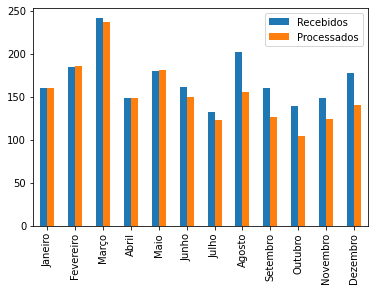

In [4]:
base.transpose().plot(kind = 'bar')
plt.show()

**Enunciado:** Usando os dados temporais disponível no link a seguir sobre vendas de medicamentos na Austrália, que tipo de conclusões podemos obter?

In [5]:
#!pip install pmdarima

In [6]:
from pmdarima.arima import auto_arima
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
base2 = pd.read_csv('https://raw.githubusercontent.com/bapimentel/Ciencia-de-Dados/master/Dados/Drugs.csv')

In [8]:
base2

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [9]:
base2.dtypes

date      object
value    float64
dtype: object

In [10]:
#Conversão dos atributos em string para o formato de data: ANO-MÊS-DIA
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
base2 = pd.read_csv('https://raw.githubusercontent.com/bapimentel/Ciencia-de-Dados/master/Dados/Drugs.csv', parse_dates = ['date'], index_col = 'date', date_parser = dateparse)
base2

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [11]:
base2.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [12]:
serieTemporal = base2['value']
serieTemporal

date
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Name: value, Length: 204, dtype: float64

In [13]:
#Valor máximo
serieTemporal.index.max()

Timestamp('2008-06-01 00:00:00')

In [14]:
#Valor mínimo
serieTemporal.index.min()

Timestamp('1991-07-01 00:00:00')

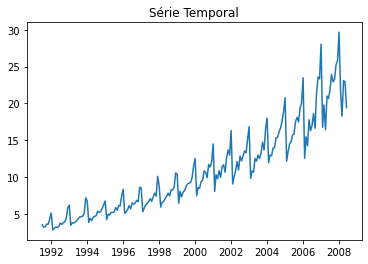

In [15]:
#Visualização da série temporal completa
plt.plot(serieTemporal)
plt.title('Série Temporal')
plt.show()

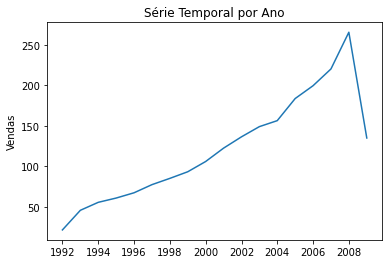

In [16]:
#Visualização por ano
serieT_ano = serieTemporal.resample('A').sum()
plt.plot(serieT_ano)
plt.title('Série Temporal por Ano')
plt.ylabel('Vendas')
plt.show()

In [17]:
serieT_ano

date
1991-12-31     21.442946
1992-12-31     45.686946
1993-12-31     55.532688
1994-12-31     60.816080
1995-12-31     67.326599
1996-12-31     77.397927
1997-12-31     85.131672
1998-12-31     93.310626
1999-12-31    105.959043
2000-12-31    122.496586
2001-12-31    136.467442
2002-12-31    149.066135
2003-12-31    156.464261
2004-12-31    183.798935
2005-12-31    199.655595
2006-12-31    220.354676
2007-12-31    265.718966
2008-12-31    135.036513
Freq: A-DEC, Name: value, dtype: float64

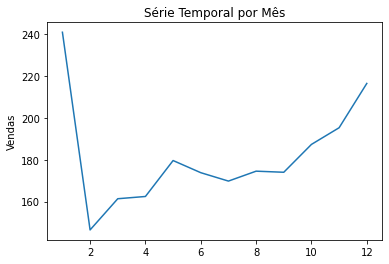

In [18]:
#Visualização por mês
serieT_mes = serieTemporal.groupby([lambda x: x.month]).sum()
plt.plot(serieT_mes)
plt.title('Série Temporal por Mês')
plt.ylabel('Vendas')
plt.show()

In [19]:
serieT_mes

1     240.915798
2     146.418128
3     161.324049
4     162.403335
5     179.582789
6     173.778687
7     169.762280
8     174.500700
9     173.979159
10    187.294785
11    195.266107
12    216.437820
Name: value, dtype: float64

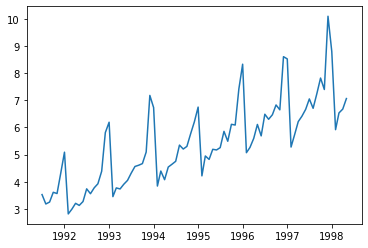

In [20]:
#Visualização entre datas específicas
serieT_datas = serieTemporal['1991-01-01':'1998-05-20']
plt.plot(serieT_datas)
plt.show()

In [21]:
#Decomposição da série temporal, criando uma variável para cada formato
decomposicao = seasonal_decompose(serieTemporal)

In [22]:
#Tendência
tendencia = decomposicao.trend
tendencia

date
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
              ..
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
2008-05-01   NaN
2008-06-01   NaN
Name: trend, Length: 204, dtype: float64

In [23]:
#Sazonalidade
sazonal = decomposicao.seasonal
sazonal

date
1991-07-01   -0.227809
1991-08-01   -0.023116
1991-09-01   -0.149022
1991-10-01    0.569161
1991-11-01    0.966836
                ...   
2008-02-01   -2.272000
2008-03-01   -1.233826
2008-04-01   -1.571464
2008-05-01   -0.593198
2008-06-01   -0.850864
Name: seasonal, Length: 204, dtype: float64

In [24]:
#Resíduos (dados que não fizeram parte da sazonalidade e nem da frequência, observações que não conseguem ser explicadas matematicamente)
residuos = decomposicao.resid
residuos

date
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
              ..
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
2008-05-01   NaN
2008-06-01   NaN
Name: resid, Length: 204, dtype: float64

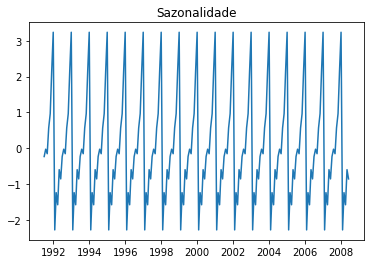

In [25]:
#Visualização de gráfico para cada formato da série temporal
plt.plot(sazonal)
plt.title('Sazonalidade')
plt.show()

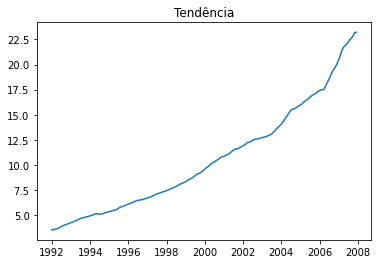

In [26]:
plt.plot(tendencia)
plt.title('Tendência')
plt.show()

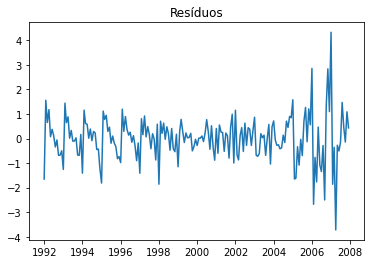

In [27]:
plt.plot(residuos)
plt.title('Resíduos')
plt.show()

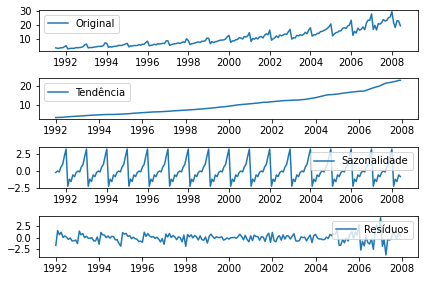

In [28]:
plt.subplot(4, 1, 1)
plt.plot(serieTemporal, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(residuos, label = 'Resíduos')
plt.legend(loc = 'best')
plt.plot()
plt.tight_layout()

In [29]:
#Implementação do autoarima para descoberta automática dos melhores parâmetros
modelo_auto = auto_arima(serieTemporal, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -252.988
Date:                            Wed, 02 Dec 2020   AIC                            519.977
Time:                                    01:03:57   BIC                            542.743
Sample:                                         0   HQIC                           529.198
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2112      0.126     -1.683      0.092      -0.457       0.035
ar.L2          0.1221      0.120      1.018      0.309      -0.113       0.357
ar.L3          0.1174      0.090      1.311      0.190      -0.058       0.293
ar.L4         -0.2340      0.077     -3.021      0.003      -0.386      -0.082
ma.L1         -0.7149      0.113     -6.315      0.000      -0.937      -0.493
ma.S.L12      -0.4786      0.063     -7.613      0.000      -0.602      -0.355
sigma2         0.8086      0.053     15.389      0.000       0.706       0.912
===================================================================================
Ljung-Box (Q):                       54.86   Jarque-Bera (JB):               176.73
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):              15.18   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
proximos_12 = modelo_auto.predict(n_periods = 12)
proximos_12

array([25.17831022, 23.46220294, 24.38065664, 26.25682221, 26.66976415,
       28.52002151, 31.49379779, 22.4323971 , 22.27540373, 23.3835532 ,
       25.28277084, 23.14484041])